In [38]:
from tp3.src.plotter import plot_bars, plot_arrays
import numpy as np
from tp3.src.optimizers import *
from tp3.src.perceptron import *
from tp3.src.trainer import TrainerConfig
from tp3.src.runner_3b import runner_3b
import matplotlib.pyplot as plt


In [113]:
'''
    Run each optimizer with datasets for training and testing
'''
config = TrainerConfig.from_file("ejercicio3-b-config.json")

run_ids_optimizers = ['GradientDescent', 'Momentum']
optimizers = [GradientDescent(), Momentum()]
results_optimizers = []

for i in range(len(run_ids_optimizers)):
    result = runner_3b(run_ids_optimizers[i], optimizers[i], config)
    results_optimizers.append(result)

Run GradientDescent started
[Data 1] expected: [-1] got: [0.88975665] data: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[Data 2] expected: [1] got: [0.92805265] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 3] expected: [-1] got: [0.25711255] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
Run GradientDescent finished
Run Momentum started
[Data 1] expected: [-1] got: [0.40222669] data: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[Data 2] expected: [1] got: [0.51721678] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 3] expected: [-1] got: [0.96288111] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]


<module 'matplotlib.pyplot' from 'C:\\Users\\ivanc\\Desktop\\sia\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

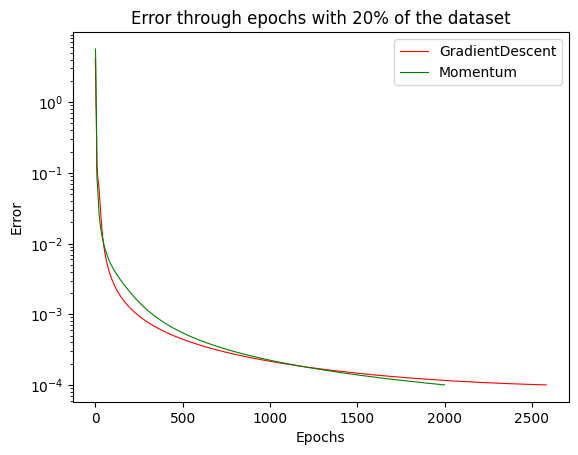

In [114]:
'''
    Plot error through epochs by optimizer
'''
plot_arrays(
    [result["training_results"].error_history for result in results_optimizers],
    run_ids_optimizers,
    'Error through epochs with 20% of the dataset',
    'Epochs',
    'Error',    
)

In [33]:
'''
    GENERALIZATION after training
'''
optimizers_name = [result["name"] for result in results_optimizers]
network_errors = [result["evaluation_results"]["err"] for result in results_optimizers]
network_expected = results_optimizers[0]["evaluation_results"]["expected_output"]
network_output = [result["evaluation_results"]["network_output"] for result in results_optimizers]

for i, optimizer in enumerate(optimizers_name):
    for j in range(len(network_output[i])):
        output = "Par" if 0 <= network_output[i][j] <= 1 else "Impar"
        input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
        print("Using optimizer: ", optimizer, ", network thinks that ", output, "is the output and it is ", input, "value", network_output[i][j])
    print("Optimizer: ", optimizer, "Error: ", network_errors[i])


[array([-0.25768421]), array([0.01165002]), array([-0.03306343])]
[array([-0.93875375]), array([0.78874477]), array([-0.97883816])]
Using optimizer:  GradientDescent , network thinks that  Impar is the output and it is  Impar value [-0.25768421]
Using optimizer:  GradientDescent , network thinks that  Par is the output and it is  Par value [0.01165002]
Using optimizer:  GradientDescent , network thinks that  Impar is the output and it is  Impar value [-0.03306343]
Optimizer:  GradientDescent Error:  [1.23141737]
[array([-0.25768421]), array([0.01165002]), array([-0.03306343])]
[array([-0.93875375]), array([0.78874477]), array([-0.97883816])]
Using optimizer:  Momentum , network thinks that  Impar is the output and it is  Impar value [-0.93875375]
Using optimizer:  Momentum , network thinks that  Par is the output and it is  Par value [0.78874477]
Using optimizer:  Momentum , network thinks that  Impar is the output and it is  Impar value [-0.97883816]
Optimizer:  Momentum Error:  [0.02

Run Gradient 1 started
[Data 1] expected: [-1] got: [-0.72625584] data: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[Data 2] expected: [1] got: [0.98219412] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 3] expected: [-1] got: [0.98774789] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
Run Gradient 1 finished
Run Gradient 2 started
[Data 1] expected: [-1] got: [-0.83458538] data: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[Data 2] expected: [1] got: [0.16470871] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 3] expected: [-1] got: [-0.64276736] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
Run G

<module 'matplotlib.pyplot' from 'C:\\Users\\ivanc\\Desktop\\sia\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

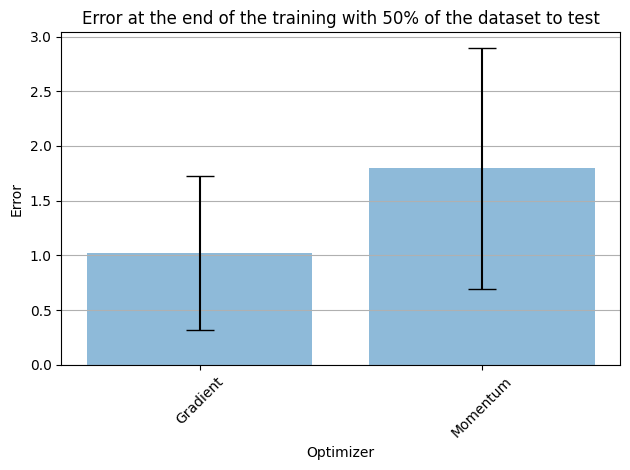

In [81]:
'''
    GENERALIZATION: Run each optimizer and plot the results
'''
config = TrainerConfig.from_file("ejercicio3-b-config.json")
n = 3

gradient_error = []
gradient_stdev = 0

for i in range(n):
    result = runner_3b(f"Gradient {i+1}", GradientDescent(), config)
    gradient_error.append(result["evaluation_results"]["err"])

gradient_mean = np.mean(gradient_error)
gradient_stdev = np.std(gradient_error)

momentum_error = []
momentum_stdev = 0

for i in range(n):
    result = runner_3b(f"Momentum {i+1}", Momentum(), config)
    momentum_error.append(result["evaluation_results"]["err"])

momentum_mean = np.mean(momentum_error)
momentum_stdev = np.std(momentum_error)

"""
    Generalization: Error by optimizer at the end of the training
"""

plot_bars(
    [gradient_mean, momentum_mean],
    [gradient_stdev, momentum_stdev],
    ["Gradient", "Momentum"],
    "Error at the end of the training with 50% of the dataset to test",
    "Optimizer",
    "Error",
)

In [36]:
'''
    Run each learning rate and plot the results with GradientDescent optimizer
'''
config = TrainerConfig.from_file("ejercicio3-c-config.json")

run_ids_gd_lr = ['10^-1', '10^-2', '10^-3']
learning_rates = [0.1, 0.01, 0.001]
results_gd_lr = []

for i in range(len(run_ids_gd_lr)):
    config.learning_rate = learning_rates[i]
    result = runner_3b(run_ids_gd_lr[i], Momentum(), config)
    results_gd_lr.append(result)

Run 10^-1 started
Run 10^-2 started
Run 10^-3 started


<module 'matplotlib.pyplot' from 'C:\\Users\\ivanc\\Desktop\\sia\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

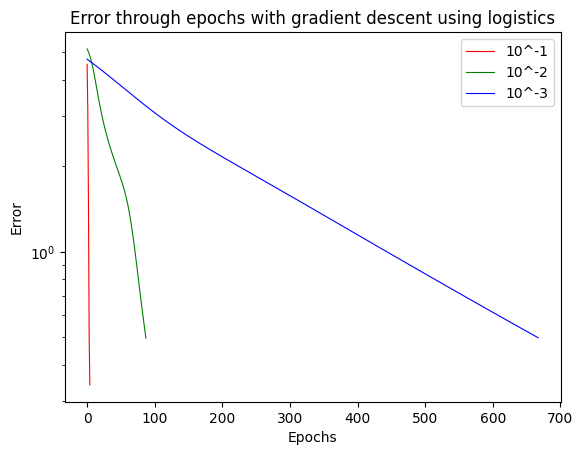

In [37]:
'''
    plot the results with GradientDescent optimizer
'''
plot_arrays(
    [result["data"].error_history for result in results_gd_lr],
    run_ids_gd_lr,
    'Error through epochs with gradient descent using logistics',
    'Epochs',
    'Error',    
)

In [ ]:
'''
    Run each learning rate and plot the results with Momentum optimizer
'''
config = TrainerConfig.from_file("ejercicio3-c-config.json")

run_ids_momentum_lr = ['10^-1', '10^-2', '10^-3']
learning_rates = [0.1, 0.01, 0.001]
results_momentum_lr = []

for i in range(len(run_ids_momentum_lr)):
    config.learning_rate = learning_rates[i]
    result = runner_3b(run_ids_momentum_lr[i], Momentum(), config)
    results_momentum_lr.append(result)

In [ ]:
'''
    plot the results with GradientDescent optimizer
'''
plot_arrays(
    [result["data"].error_history for result in results_momentum_lr],
    run_ids_momentum_lr,
    'Error through epochs',
    'Epochs',
    'Error',    
)

[Data 1] expected: [-1] got: [0.93708031] data: [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[Data 2] expected: [1] got: [0.9523503] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[Data 3] expected: [-1] got: [0.9773694] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 4] expected: [1] got: [0.95865826] data: [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[Data 5] expected: [-1] got: [0.98209779] data: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 6] expected: [1] got: [0.98093608] data: [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 7] expected: [-1] got: [0.97210086] data: [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

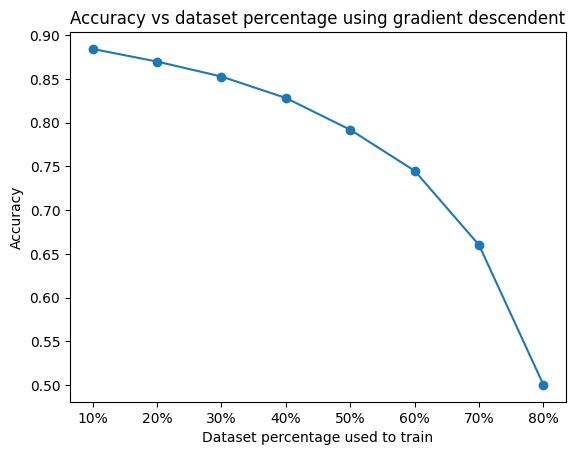

In [44]:
from tp3.src.trainer import evaluate_multilayer_perceptron, train_multilayer_perceptron

'''
    Accurancy vs dataset percentage
'''

config = TrainerConfig.from_file("ejercicio3-b-config.json")

with open("./digits.txt", "r") as file:
    # Leer cada línea del archivo y convertirla en una lista de enteros
    numbers = [[int(num) for num in line.split()] for line in file]

# Convertir la lista de listas en un vector de números
vector = [num for sublist in numbers for num in sublist]

dataset_input = [vector[i : i + 35] for i in range(0, len(vector), 35)]

dataset_outputs = [[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]]

perceptrons_by_layer = [35, 15, 15, 1]
perceptrons = []

for p in perceptrons_by_layer:
    nl = [0] * p
    perceptrons.append(nl)

for i in range(len(perceptrons_by_layer)):
    for j in range(perceptrons_by_layer[i]):
        if i == 0:
            perceptrons[i][j] = Perceptron(
                initial_weights=np.random.random(len(dataset_input[0]) + 1) * 0.8
                - 0.4,
                theta_func=config.theta,
            )
        else:
            perceptrons[i][j] = Perceptron(
                initial_weights=np.random.random(perceptrons_by_layer[i - 1] + 1)
                * 0.8
                - 0.4,
                theta_func=config.theta,
            )

run_ids_dataset_percentages = ['10%','20%','30%','40%', '50%', '60%', '70%', '80%']
total_input = len(dataset_input)
results=[]
for k in range(0, 100):
    accuracy_results = []
    for(i, dataset_percentage) in enumerate(run_ids_dataset_percentages):
        i+=1
        ok = 0
        multilayer_perceptron_parity = MultilayerPerceptron(perceptrons, GradientDescent())
        training_results = train_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[:i],
            dataset_outputs=dataset_outputs[:i],
            config=config,
        )

        evaluation_results = evaluate_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[i:],
            dataset_outputs=dataset_outputs[i:],
            error_func=config.error_func,
            print_output=True,
            acceptable_error=config.acceptable_error,
        )

        network_errors = evaluation_results["err"]
        network_expected = evaluation_results["expected_output"]
        network_output = evaluation_results["network_output"]
        for j in range(len(network_output)):
            output = "Par" if 0 <= network_output[j][0] <= 1 else "Impar"
            input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
            if output == input:
                ok += 1
            print("Network thinks that ", output, "is the output and it is ", input, "value", network_output[j][0])
        accuracy_results.append(ok/(total_input-i))
    results.append(accuracy_results)

average = np.average(results, axis=0)

plt.figure()
plt.plot(run_ids_dataset_percentages, average, '-o')
plt.xlabel('Dataset percentage used to train')
plt.ylabel('Accuracy')
plt.title('Accuracy vs dataset percentage using gradient descendent')
plt.show()
